## 📊 Project Overview: Customer Credit Consumption Prediction

### 🧾 Objective:

To build a machine learning model that predicts the **average credit card spend** of customers for the **next three months**, based on their **demographic data, financial behavior, and historical transaction patterns**. The model helps in better **customer profiling** and supports **targeted financial offerings** by banking institutions.

---

### 🏦 Business Context:

In the credit card industry, understanding customer-level spending behavior is crucial for strategic decisions like personalized offers, risk assessment, and customer retention. This project aims to analyze customer data to uncover patterns in credit card consumption and forecast future spending for improved decision-making.

---

### 📁 Dataset:

The project uses three datasets:

* **Customer Demographics** – Basic profile details like age, income, region, banking tenure, etc.
* **Behavioral Data** – Credit/debit card transactions, loan history, asset holdings, and account activity over three months (April to June).
* **Credit Consumption** – Target variable indicating average credit card consumption over the upcoming three months (July to September); partially missing and used for prediction.

---

### 🔧 Methodology:

* **Data Preprocessing**: Merged datasets, handled missing values, outliers, and inconsistent data.
* **Feature Engineering**: Created meaningful derived variables to enhance model learning (e.g., transaction frequency, credit utilization).
* **EDA**: Explored key trends and correlations influencing credit card spending.
* **Modeling**: Built and tuned regression models (e.g., Linear Regression, Decision Tree, etc.).
* **Evaluation**: Assessed model performance using **RMSPE (Root Mean Square Percentage Error)**.
* **Prediction**: Generated credit consumption predictions for customers with missing target values.

---

### 🧠 Skills & Tools Used:

* **Languages**: Python
* **Libraries**: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn
* **Techniques**: Data Cleaning, Feature Engineering, Regression Modeling, Model Evaluation, Predictive Analytics

---

### ✅ Outcome:

Achieved a predictive model capable of estimating future credit card spending with minimized error. The insights derived enable banks to personalize services and refine their customer engagement strategies.


In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('C:\\Users\\ASUS\\OneDrive\\Desktop\\python case studies\\Machine Learning Projects\\11. Capstone Case Study - Predict Cred Card Consumption')

#### Uploading Data

In [7]:
customer = pd.read_excel('CustomerDemographics.xlsx')
CustomerBehavior = pd.read_excel('CustomerBehaviorData.xlsx')
CreditConsumption = pd.read_excel('CreditConsumptionData.xlsx')

In [16]:
customer.head(2)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,current,M,30,MEDIUM,26.4,9,9,355,0
1,11491,current,M,37,LOW,14.4,7,7,485,0


In [14]:
CustomerBehavior.head(2)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,2017.46,29066.66,15919.84,2197.00,3752.00,29798.00,1.0,4,35,...,47,20,41860.0,32734.75,80959.0,36,9,171200.0,Y,3448.84
1,11491,7687.00,1308.00,41888.92,2216.92,7060.53,3143.36,2.0,27,50,...,0,8,113367.0,60974.75,495080.0,5,3,15694.0,Y,3812.69


In [18]:
CreditConsumption.head(2)

,ID,cc_cons
0,17051,16239.0
1,11491,39002.0


#### Understanding Data

In [20]:
CreditConsumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [22]:
CreditConsumption.tail()

,ID,cc_cons
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN
19999,12413,NaN


In [25]:
CustomerBehavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            19999 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

#### Checking for Null Values

In [42]:
print('Missing values in customer\n',customer.isnull().sum())
print('Missing values in CustomerBehavior\n',CustomerBehavior.isnull().sum())
print('Missing values in CreditConsumption\n',CreditConsumption.isnull().sum())

Missing values in customer
 ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
dtype: int64
Missing values in CustomerBehavior
 ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              1
dc_cons_may              1
cc_cons_jun              0
dc_cons_jun              1
cc_count_apr             1
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     1
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             2
investment_4    

In [44]:
CustomerBehavior.dropna(inplace=True)

#### Preparing the Dataset

In [53]:
merged_df = CustomerBehavior.merge(customer,how='left',on='ID')

In [57]:
merged_df = merged_df.merge(CreditConsumption,how='left',on='ID')

In [61]:
merged_df.shape

(19991, 49)

Note: Some customers are having missing values for credit consumption. You need to build
the model using customer’s data where credit consumption is non- missing’s. You need to
predict the credit consumption for next three months for the customers having missing
values.

In [65]:
test_df = merged_df[merged_df['cc_cons'].isnull()]

In [71]:
test_df.to_csv('testttttt.csv',index=False)

In [74]:
train_df = merged_df[~merged_df['cc_cons'].isnull()]

In [76]:
train_df.shape,test_df.shape

((14993, 49), (4998, 49))

#### Exploratory Data Analysis

In [79]:
train_df.describe()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_count_jun,max_credit_amount_jun,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
count,14993.000000,14993.000000,14993.000000,1.499300e+04,14993.000000,14993.000000,14993.000000,14993.000000,14993.00000,14993.000000,...,14993.000000,1.499300e+04,1.499300e+04,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10032.206230,17961.834649,8168.237205,1.633949e+04,7704.676979,12129.386670,7099.351901,41.500700,33.48516,41.506103,...,44.647969,5.257668e+04,1.575568e+04,47.766624,15.185073,5.510438,5.510438,598.397385,0.719602,9369.569257
std,5761.048272,25192.717712,14769.893627,2.706671e+04,18991.347323,18491.427033,13254.450825,97.453103,49.54702,47.350281,...,35.088853,1.282776e+05,1.179405e+05,30.573014,20.316444,2.866058,2.866058,220.085924,0.449208,7554.028948
min,1.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.00000,1.000000,...,0.000000,6.000000e-02,0.000000e+00,25.000000,0.500000,1.000000,1.000000,123.000000,0.000000,610.099000
25%,5059.000000,4411.220000,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.000000,5.000000,8.00000,10.000000,...,12.000000,1.903800e+04,1.548510e+03,33.000000,5.100000,3.000000,3.000000,424.000000,0.000000,4808.670000
50%,10053.000000,10288.100000,3994.800000,8.690170e+03,3820.000000,6655.250000,3327.000000,10.000000,23.00000,35.000000,...,38.000000,3.042500e+04,3.953580e+03,40.000000,9.900000,6.000000,6.000000,623.000000,1.000000,7409.948800
75%,15016.000000,21410.250000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,43.00000,61.000000,...,73.000000,5.320200e+04,9.372410e+03,53.000000,18.000000,8.000000,8.000000,799.000000,1.000000,11518.657600
max,19998.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.00000,653.000000,...,133.000000,5.200000e+06,7.447125e+06,223.000000,203.000000,10.000000,10.000000,974.000000,1.000000,160735.934800


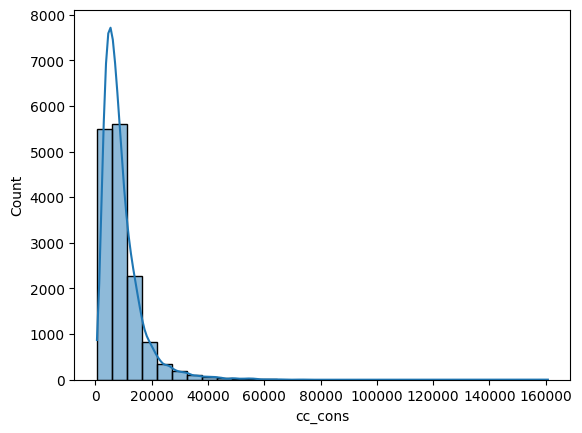

In [87]:
sns.histplot(train_df['cc_cons'],bins=30,kde=True)
plt.show()

Correlation Check

In [92]:
corr_mat = train_df.select_dtypes('number').corr()

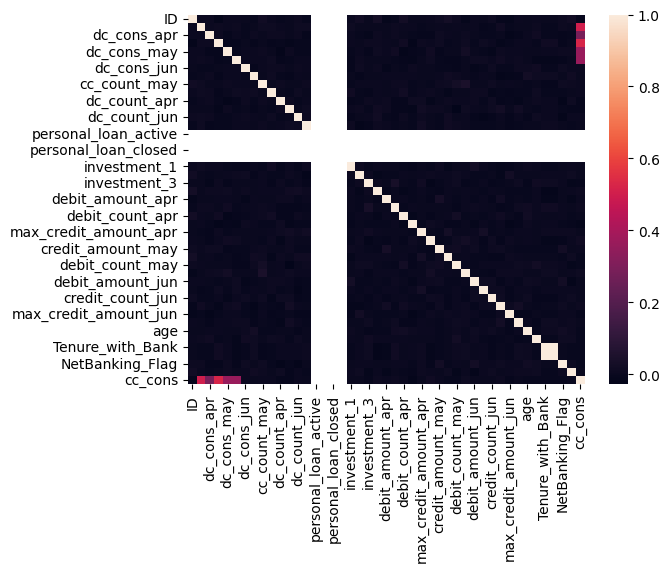

In [100]:
sns.heatmap(corr_mat)
plt.show()

#### Handling Categorical Values

In [103]:
from sklearn.preprocessing import LabelEncoder

In [119]:
cat_col = ['loan_enq', 'account_type', 'gender', 'Income']

In [117]:
for col in cat_col:
    train_df[col] = train_df[col].astype('str')

In [121]:
le = LabelEncoder()
mapping_dict = {}
for col in cat_col:
    train_df[col] = le.fit_transform(train_df[col])
    temp_dict = dict(zip(le.classes_,sorted(train_df[col].unique())))
    mapping_dict.update(temp_dict)

print(mapping_dict)

{'Y': 0, 'current': 0, 'saving': 1, 'F': 0, 'M': 1, 'HIGH': 0, 'LOW': 1, 'MEDIUM': 2}


In [129]:
mapping_df = pd.DataFrame(mapping_dict.items(),columns=['id','value'])

In [131]:
mapping_df.to_csv('mapping_dict.csv',index=False)

#### Standardization

In [134]:
from sklearn.preprocessing import StandardScaler

In [138]:
x = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

In [140]:
ss = StandardScaler()
x_ft = ss.fit_transform(x)
x_ft = pd.DataFrame(x_ft)

In [144]:
x_ft.head(3)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.218359,-0.632917,1.414981,-0.015505,-0.290019,-0.453057,1.712587,-0.415606,-0.595114,-0.137408,...,-0.104351,-0.422723,0.39854,-0.581141,0.689085,0.552031,1.217588,1.217588,-1.105957,-1.601988
1,0.253225,-0.407863,-0.464490,0.943974,-0.288971,-0.274128,-0.298475,-0.405344,-0.130893,0.179390,...,-0.101266,-0.422723,0.39854,-0.352173,-0.879853,-0.038644,0.519742,0.519742,-0.515259,-1.601988
2,-0.451184,-0.351993,0.450777,-0.489616,-0.365183,0.728643,-0.426614,0.025647,-0.514380,0.116031,...,-0.053612,-0.422723,0.39854,-0.483011,0.689085,-0.589939,-1.573795,-1.573795,0.752470,-1.601988


In [223]:
import pickle
with open('./standardscaler.pkl','wb') as file:
    pickle.dump(ss,file)

#### Train Test Split

In [149]:
from sklearn.model_selection import train_test_split

In [153]:
xtrain,xtest,ytrain,ytest = train_test_split(x_ft,y,test_size=0.20,random_state=64)

In [155]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((11994, 48), (2999, 48), (11994,), (2999,))

#### Model Selection

Linear Regression

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [162]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
pred_lr = lr.predict(xtest)

In [168]:
def get_rms_percentage_error(pred,ytest):
    mse = mean_squared_error(pred,ytest)
    rmse = np.sqrt(mse)
    rms_percentage_error = (rmse/np.mean(ytest))*100
    print(' RMSE :',rmse,'\n','rms_percentage_error :',rms_percentage_error)

In [170]:
get_rms_percentage_error(pred_lr,ytest)

 RMSE : 2546.4375351141666 
 rms_percentage_error : 27.7552868278536


In [179]:
pred_lr_train = lr.predict(xtrain)
get_rms_percentage_error(pred_lr_train,ytrain)

 RMSE : 2717.090159552083 
 rms_percentage_error : 28.848993278661776


Decision Tree Regressor

In [175]:
from sklearn.tree import DecisionTreeRegressor

In [200]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
pred_dtr = dtr.predict(xtest)
get_rms_percentage_error(pred_dtr,ytest)

 RMSE : 3927.8222202838874 
 rms_percentage_error : 42.811901265784776


In [183]:
pred_dtr_train = dtr.predict(xtrain)
get_rms_percentage_error(pred_dtr_train,ytrain)

 RMSE : 0.0 
 rms_percentage_error : 0.0


Random Forest Regressor

In [192]:
from sklearn.ensemble import RandomForestRegressor

In [194]:
rgb = RandomForestRegressor()
rgb.fit(xtrain,ytrain)
pred_rgb = rgb.predict(xtest)
get_rms_percentage_error(pred_rgb,ytest)

 RMSE : 3106.957562419776 
 rms_percentage_error : 33.86476091315686


In [196]:
pred_rgb_train = rgb.predict(xtrain)
get_rms_percentage_error(pred_rgb_train,ytrain)

 RMSE : 1216.2460680501808 
 rms_percentage_error : 12.913621772551966


Grid Search CV

In [203]:
from sklearn.model_selection import GridSearchCV

In [207]:
params = {'max_depth':[2,3,4,5],
          'min_samples_split':[20,30,40,50]}

In [209]:
dt1 = DecisionTreeRegressor()
gc = GridSearchCV(dt1,params)

In [211]:
gc.fit(xtrain,ytrain)
pred_gc = gc.predict(xtest)
get_rms_percentage_error(pred_gc,ytest)

 RMSE : 4767.993577835204 
 rms_percentage_error : 51.96947795550256


In [213]:
pred_gc_train = gc.predict(xtrain)
get_rms_percentage_error(pred_gc_train,ytrain)

 RMSE : 4466.895235671088 
 rms_percentage_error : 47.427734474444236


Gradient Bossting Regressor

In [216]:
from sklearn.ensemble import GradientBoostingRegressor

In [218]:
gb = GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
pred_gb = gb.predict(xtest)
get_rms_percentage_error(pred_gb,ytest)

 RMSE : 2860.3538280181524 
 rms_percentage_error : 31.176865652914387


In [220]:
pred_gb_train = gb.predict(xtrain)
get_rms_percentage_error(pred_gb_train,ytrain)

 RMSE : 2420.3251453117996 
 rms_percentage_error : 25.698059228475064


##### Best Model - Linear Regression

In [ ]:
with open('./BestModel.pkl','wb') as file:
    pickle.dump(lr,)